In [3]:
!poetry add pyarrow
!poetry add seaborn

The following packages are already present in the pyproject.toml and will be skipped:

  - pyarrow

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.
The following packages are already present in the pyproject.toml and will be skipped:

  - seaborn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as nsn

plt.style.use("ggplot")

# Understanding the problem

Ejercicio

In [ ]:
data_path = "/home/hasierza/datos/"

contenido de los diferentes parquet.

In [ ]:
orders = pd.read_parquet(f"{data_path}/orders.parquet")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


user order seq es para ver q orden es. 

In [ ]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [ ]:
users = pd.read_parquet(f"{data_path}/users.parquet")
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [ ]:
users.dropna().head() #liminar las filas que contienen valores NaN 

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
4751,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0
3154,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0
736,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0
4792,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0
2217,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0


In [ ]:
regulars = pd.read_parquet(f"{data_path}/regulars.parquet")
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [ ]:
regulars.head()

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11


In [ ]:
inventory = pd.read_parquet(f"{data_path}/inventory.parquet")
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [ ]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [ ]:
abandoned_carts = pd.read_parquet(f"{data_path}/abandoned_carts.parquet")
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [ ]:
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


Se han visualizado las diferentes tablas, la tabla  users contiene NaN

# Analisis  

### 1. Compradores
### 2. Stock // productos
### 3. Reconstruir



## 1. Compradores


In [ ]:
## Add  n_regulars to ussers profile. n_regulars is the number of different products saved by the user.
n_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns={'variant_id': 'n_regulars'}) #nunique() devuelve el número de valores únicos. 
users = users.merge(n_regulars, on='user_id', how='left').fillna({'n_regulars':0}) #rellenar los valores NaN con 0. #merge() combina dos dataframes. #on='user_id' indica la columna por la que se va a hacer el merge. #how='left' indica que se va a hacer un left join.
#left join: Devuelve todos los registros de la tabla de la izquierda y los registros coincidentes de la tabla de la derecha. Los registros de la tabla de la izquierda que no tienen correspondencia en la tabla de la derecha, se rellenan con valores nulos.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
 10  n_regulars             4983 non-null   float64
dtypes: float64(6), object(5)
memory usage: 428.4+ KB


In [ ]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
users.dropna().head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
23,09d70e0b0778117aec5550c08032d56f8e06f992741680...,Proposition,UKI,2021-06-28 12:07:04,2021-06-01 00:00:00,1.0,1.0,0.0,0.0,0.0,0.0
27,4f5ff38ce5ed48096ba80dff80e167db1ad24b9ebdb00c...,Top Up,UKD,2020-06-12 12:07:35,2020-06-01 00:00:00,3.0,2.0,0.0,1.0,0.0,1.0
28,7b2ae50bb11646436fa613394fc3e71e1a0cdc3ba30cdb...,Proposition,UKF,2020-10-03 09:53:57,2020-10-01 00:00:00,2.0,2.0,0.0,0.0,2.0,25.0
35,5e977a4aa2c57f306b8a22f92eaaa177f7dc31a52df82c...,Proposition,UKI,2021-10-14 10:41:13,2021-10-01 00:00:00,2.0,1.0,1.0,0.0,1.0,72.0
66,eafb89ad33eb377adb98a915b6a5a65f1284c2db517d07...,Proposition,UKH,2022-01-20 15:53:09,2022-01-01 00:00:00,2.0,2.0,0.0,0.0,0.0,3.0


In [ ]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets,n_regulars
count,325.000000,325.000000,325.000000,325.000000,325.000000,4983.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923,2.481437
std,1.365753,0.869577,1.026246,0.289086,0.995603,8.890588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000,320.000000


<Axes: >

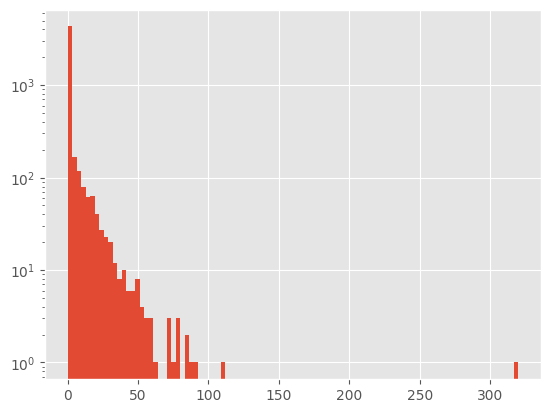

In [ ]:
#histogram of n_regulars, logaritmic to view better
users['n_regulars'].hist(bins=100, log=True) 

In [ ]:
users.loc[lambda x: x.n_regulars < 100].n_regulars.describe()

count    4981.000000
mean        2.396105
std         7.516721
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        90.000000
Name: n_regulars, dtype: float64

In [ ]:
(users['n_regulars']> 10).sum() / len(users) #porcentaje de usuarios que han guardado más de 10 productos

0.07264699979931769

Text(0.5, 1.0, 'Average number of regulars per user segment')

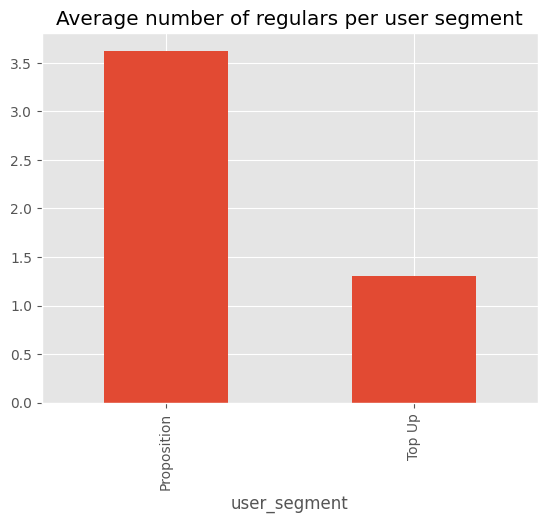

In [ ]:
users.loc[lambda x: x.n_regulars < 100].groupby('user_segment')['n_regulars'].mean().plot(kind='bar') #groupby() agrupa los datos por la columna indicada. #mean() calcula la media de los valores agrupados. #plot() crea un gráfico. #kind='bar' indica que el gráfico es de barras.
plt.title('Average number of regulars per user segment') 

In [ ]:
family_cols = [col for col in users.columns if col.startswith('count_')] #
family_inputs = users.count_people.dropna().count() #count_people es el número de personas en la familia. #dropna() elimina los valores NaN. #count() cuenta el número de valores no NaN.

d={f"any_{col}":(users[col]> 0).sum()/family_inputs for col in family_cols} 

In [ ]:
#Household with either pets, children or babies
(users[['count_pets','count_children','count_babies']].sum(axis=1)>0).sum()/ family_inputs #porcentaje de hogares con mascotas, niños o bebés

0.6123076923076923

In [ ]:
print(users.columns)


Index(['user_id', 'user_segment', 'user_nuts1', 'first_ordered_at',
       'customer_cohort_month', 'count_people', 'count_adults',
       'count_children', 'count_babies', 'count_pets', 'n_regulars'],
      dtype='object')


<Axes: xlabel='user_nuts1'>

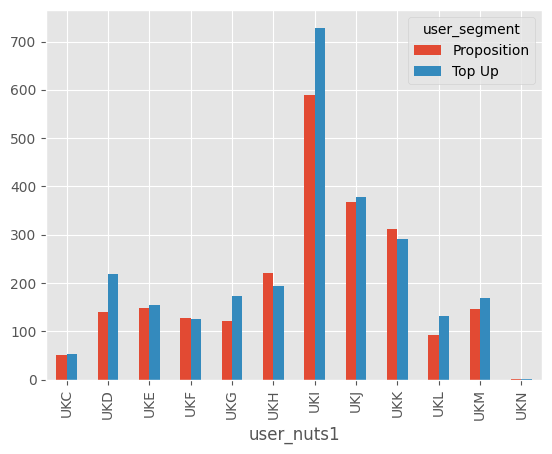

In [ ]:
pd.crosstab(users['user_nuts1'],users['user_segment']).plot(kind='bar')

### Insigths:



## Understanding regulars products


In [ ]:
regulars_df = regulars.merge(inventory, on='variant_id', how= 'left') #merge() combina dos dataframes. #on='variant_id' indica la columna por la que se va a hacer el merge. #how='left' indica que se va a hacer un left join.


In [ ]:
regulars_df.head()

,user_id,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
1,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
2,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03,NaN,NaN,NaN,NaN,NaN
3,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35,NaN,NaN,NaN,NaN,NaN
4,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11,3.49,3.5,method,cleaning-products,"[cruelty-free, eco, vegan, window-glass-cleaner]"


No todos los regulars products estan en el inventario

In [ ]:
regulars_df.isna().sum()

user_id                0
variant_id             0
created_at             0
price               3071
compare_at_price    3071
vendor              3071
product_type        3071
tags                3071
dtype: int64

In [ ]:
clean_regulars = regulars_df.dropna() #eliminar las filas que contienen valores NaN.  q son las q no estan en el inventario.

<Axes: xlabel='variant_id'>

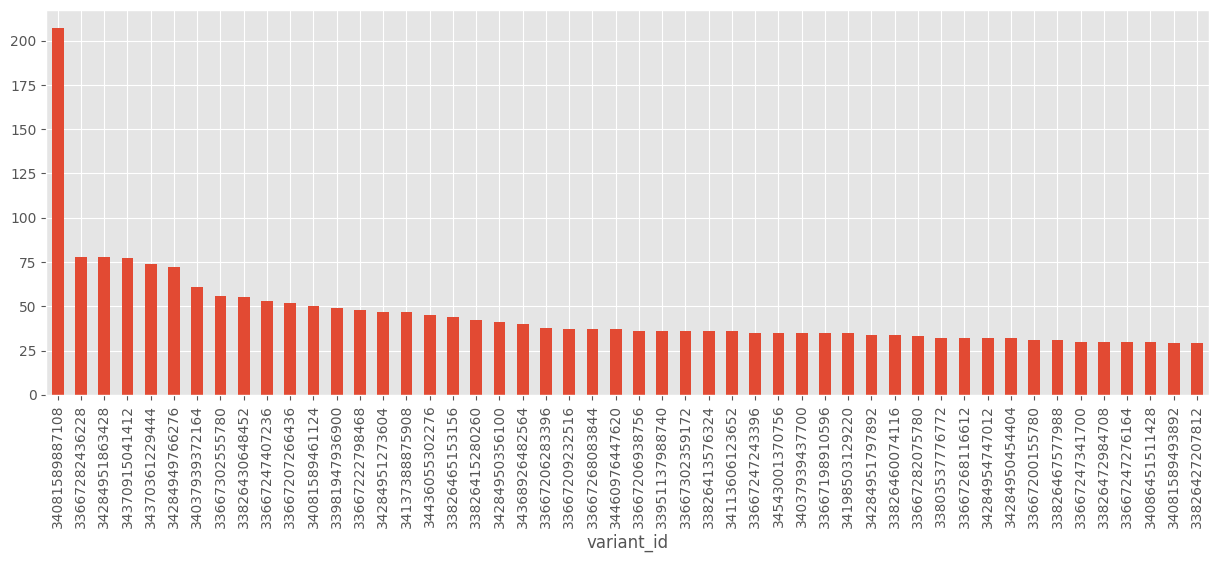

In [ ]:
clean_regulars.groupby(['variant_id'])['user_id'].nunique().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
#cuantos usuarios han guardado cada producto.

In [ ]:
top_product = clean_regulars.groupby(['variant_id'])['user_id'].nunique().sort_values(ascending=False).head(1).index[0] #producto más guardado


In [ ]:
# Imprimir las columnas del DataFrame
print(clean_regulars.columns)


Index(['user_id', 'variant_id', 'created_at', 'price', 'compare_at_price',
       'vendor', 'product_type', 'tags'],
      dtype='object')


In [ ]:
clean_regulars.loc[lambda x: x.variant_id == top_product][['variant_id', 'price','product_type','vendor'  ]].drop_duplicates()

,variant_id,price,product_type,vendor
95,34081589887108,10.79,long-life-milk-substitutes,oatly


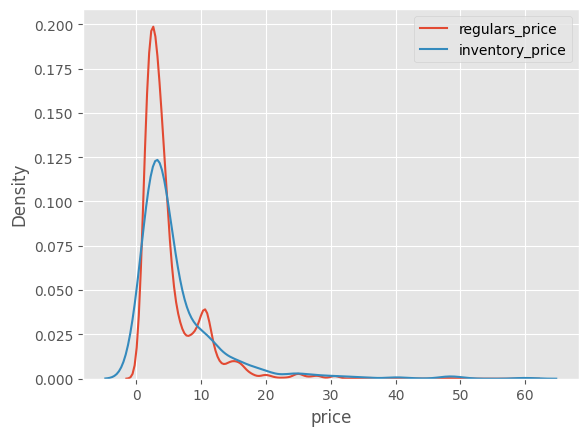

In [ ]:

nsn.kdeplot(clean_regulars.price, label = 'regulars_price')
nsn.kdeplot(inventory.price, label = 'inventory_price')
plt.legend()

Text(0.5, 1.0, 'Top 100 vendors by regular number of regulars (out of367vendors)')

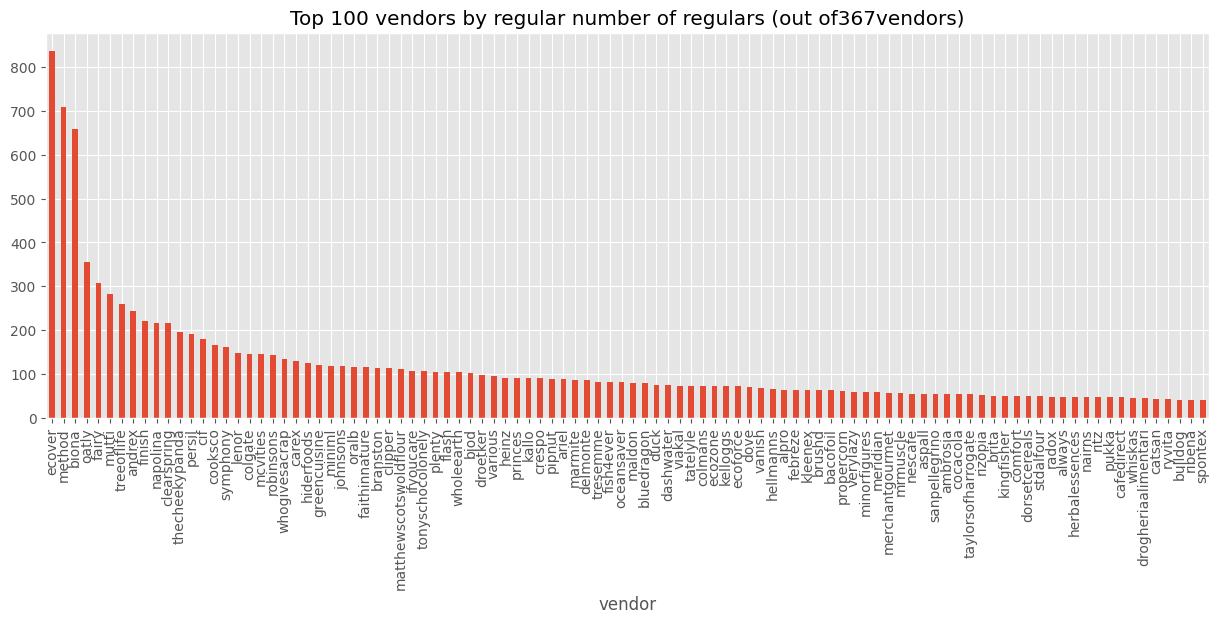

In [ ]:
clean_regulars['vendor'].value_counts().head(100).plot(kind= 'bar', figsize=(15,5))
plt.title(f"Top 100 vendors by regular number of regulars (out of{clean_regulars.vendor.nunique()}vendors)")

Text(0.5, 1.0, 'Top 50 product_type by number of regulars (out of58) product types')

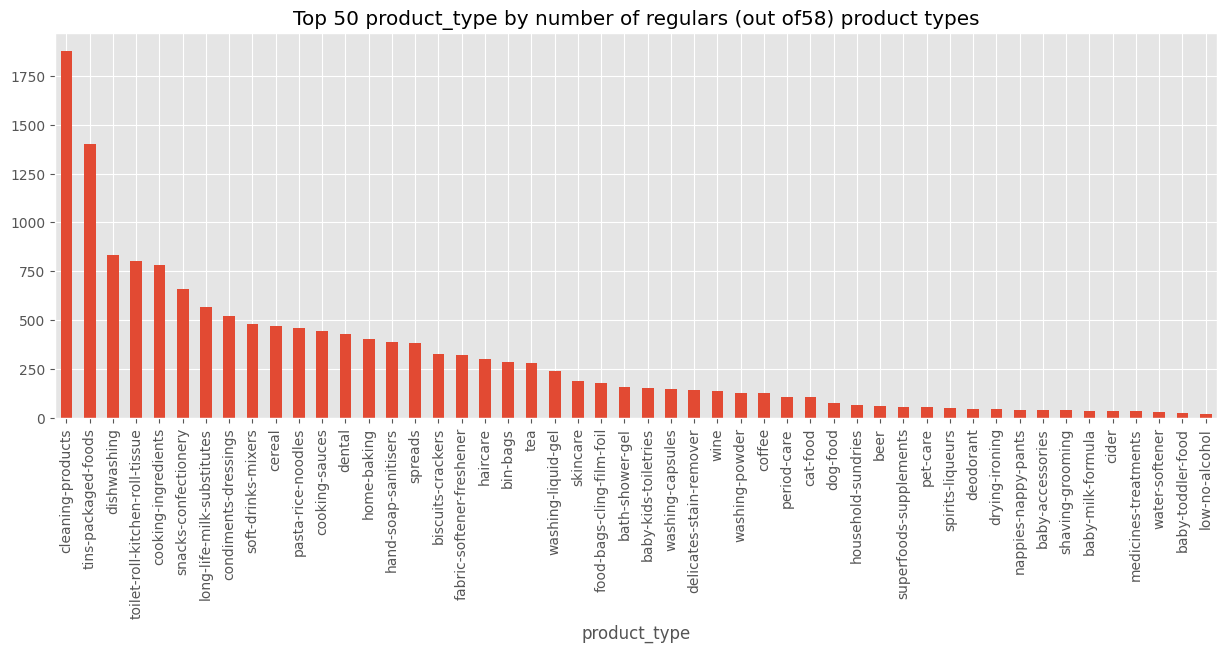

In [ ]:
clean_regulars['product_type'].value_counts().head(50).plot(kind='bar',figsize=(15,5))
plt.title(f'Top 50 product_type by number of regulars (out of{clean_regulars.product_type.nunique()}) product types')

Text(0.5, 1.0, 'Top 50 product_type by number of products (out of 59product_types)')

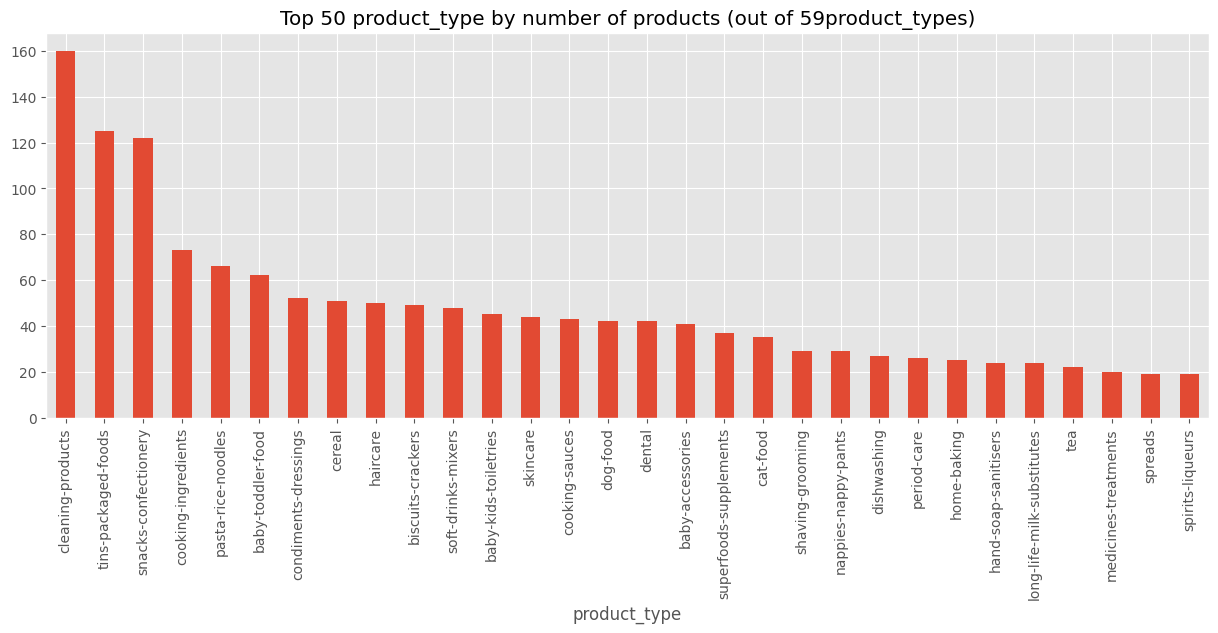

In [ ]:
inventory['product_type'].value_counts().head(30).plot(kind='bar',figsize=(15,5))
plt.title(f'Top 50 product_type by number of products (out of {inventory.product_type.nunique()}product_types)')

In [ ]:
diff_prevalance = (
    inventory['product_type'].value_counts(normalize=True).rename('inventory_count').reset_index().merge(
        clean_regulars['product_type'].value_counts(normalize=True).rename('regulars_count').reset_index()
    )
    .assign(inventory_rank=lambda x: x.inventory_count.rank(ascending=False))
    .assign(regulars_rank=lambda x: x.regulars_count.rank(ascending=False))
    .assign(diff=lambda x: x.inventory_count - x.regulars_count)

)

In [ ]:
diff_prevalance.sort_values('regulars_count', ascending=False).head()

,product_type,inventory_count,regulars_count,inventory_rank,regulars_rank,diff
0,cleaning-products,0.092325,0.124850,1.0,1.0,-0.032525
1,tins-packaged-foods,0.072129,0.093255,2.0,2.0,-0.021126
21,dishwashing,0.015580,0.055474,22.0,3.0,-0.039894
31,toilet-roll-kitchen-roll-tissue,0.010387,0.053346,32.5,4.0,-0.042959
3,cooking-ingredients,0.042123,0.052148,4.0,5.0,-0.010025


con esto vemos los rankin de categorias de productos mas guardados y  q mas tipos de esas tenemos  en el inventario.

## Orders

In [ ]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [ ]:
orders.order_date.min(), orders.order_date.max()


(Timestamp('2020-04-30 00:00:00'), Timestamp('2022-03-14 00:00:00'))

In [ ]:
orders.user_id.nunique()

4983

In [ ]:
orders.loc[lambda x: x.user_order_seq > 1].user_id.nunique() #to use how many users have made more than one order

1411

<Axes: xlabel='user_order_seq'>

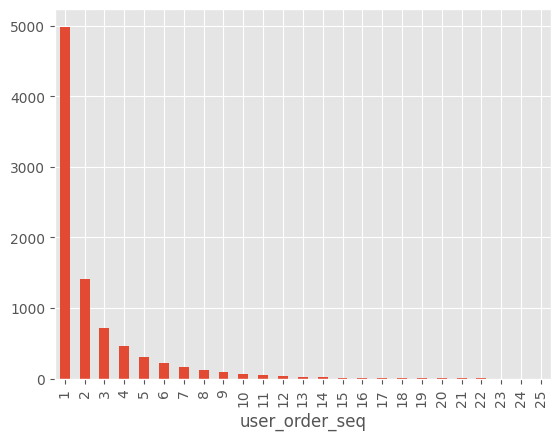

In [ ]:
orders['user_order_seq'].value_counts().plot(kind='bar')

<Axes: xlabel='user_order_seq'>

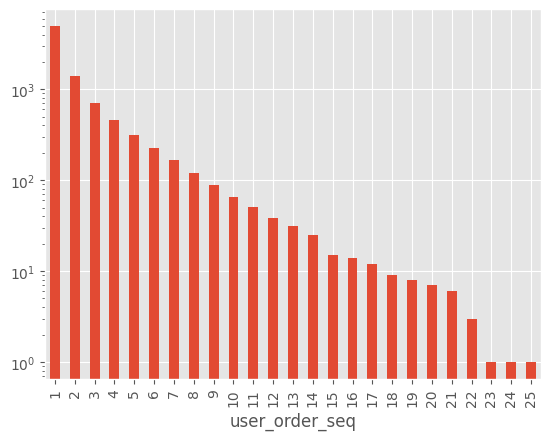

In [ ]:
orders['user_order_seq'].value_counts().plot(kind='bar',logy=True)

In [ ]:
#explode ordered_items so i get a row per item ordered.
order_items = orders.explode('ordered_items').rename({'ordered_items': 'variant_id'}, axis=1) #explode() convierte una columna que contiene listas en filas. #en ordered items teniamos mas de un item y ahora lo hemos separado en filas.


In [ ]:
order_items = order_items.merge(inventory, on='variant_id', how='left')


In [ ]:
print(f"pct pf missing bought products on inventory: {100*order_items.price.isna().sum() / order_items.shape[0] : .2f}%") #porcentaje de productos comprados que no están en el inventario.



pct pf missing bought products on inventory:  14.45%


In [ ]:
order_items.dropna().head()

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,tags
70,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
71,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,33667238658180,4.19,5.10,listerine,dental,[mouthwash]
76,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206054020,17.99,20.65,ecover,delicates-stain-remover,"[cruelty-free, delicates-stain-remover, eco, v..."
77,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,33667206283396,9.99,12.00,ecover,fabric-softener-freshener,"[cruelty-free, eco, fabric-softener-freshener,..."
81,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,39459277602948,5.79,5.98,ecloth,cleaning-products,"[eco, sponges-cloths-gloves]"


In [ ]:
def compute_basquet(df: pd.DataFrame, level: str) -> pd.DataFrame:
    return(
        df
        .dropna(subset=[level])
        .drop_duplicates(subset=['id', level])
        .groupby([level])['id'].nunique().reset_index().rename(columns={'id': 'n_baskets'})
        .assign(top_basquets= lambda x: x.n_baskets / orders.id.nunique())
    )

In [ ]:
product_type_composition = compute_basquet(order_items, 'product_type')

In [ ]:
product_type_composition.sort_values(ascending=False, by= 'n_baskets').head(10)

,product_type,n_baskets,top_basquets
12,cleaning-products,3500,0.398951
51,tins-packaged-foods,3281,0.373988
52,toilet-roll-kitchen-roll-tissue,3131,0.356890
29,long-life-milk-substitutes,2657,0.302861
20,dishwashing,2632,0.300011
44,snacks-confectionery,1920,0.218853
15,cooking-ingredients,1817,0.207113
45,soft-drinks-mixers,1793,0.204377
14,condiments-dressings,1732,0.197424
10,cereal,1653,0.188419


In [ ]:
print(product_type_composition.columns)

Index(['product_type', 'n_baskets', 'top_basquets'], dtype='object')


<Axes: xlabel='product_type'>

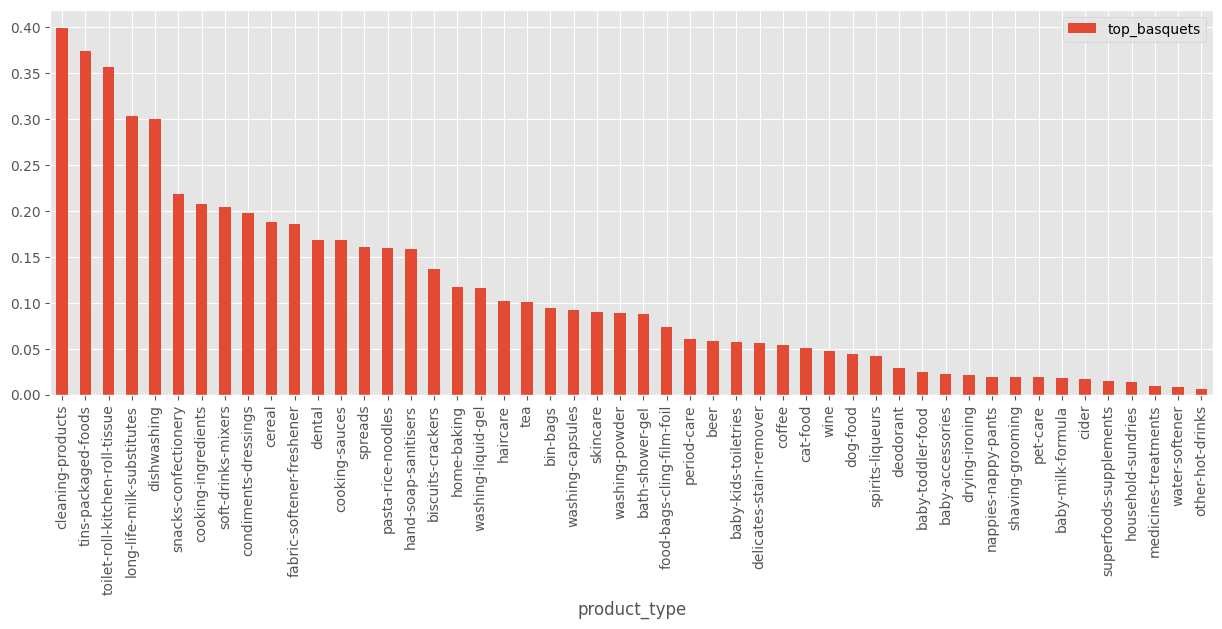

In [ ]:
product_type_composition.sort_values(ascending=False, by='n_baskets').head(50).plot(x='product_type', y='top_basquets', kind='bar', figsize=(15,5))

In [ ]:
variant_id_composition = compute_basquet(order_items, 'variant_id')

In [ ]:
variant_id_composition.sort_values(ascending=False, by='n_baskets').head(10)

,variant_id,n_baskets,top_basquets
1324,39284117930116,2658,0.302975
675,34081589887108,1616,0.184202
726,34137590366340,1459,0.166306
656,34081331970180,1170,0.133364
853,34284951863428,862,0.098256
829,34284949766276,617,0.070329
983,34370361229444,587,0.066910
835,34284950356100,561,0.063946
632,34037939372164,520,0.059273
993,34370915041412,504,0.057449


<Axes: xlabel='variant_id'>

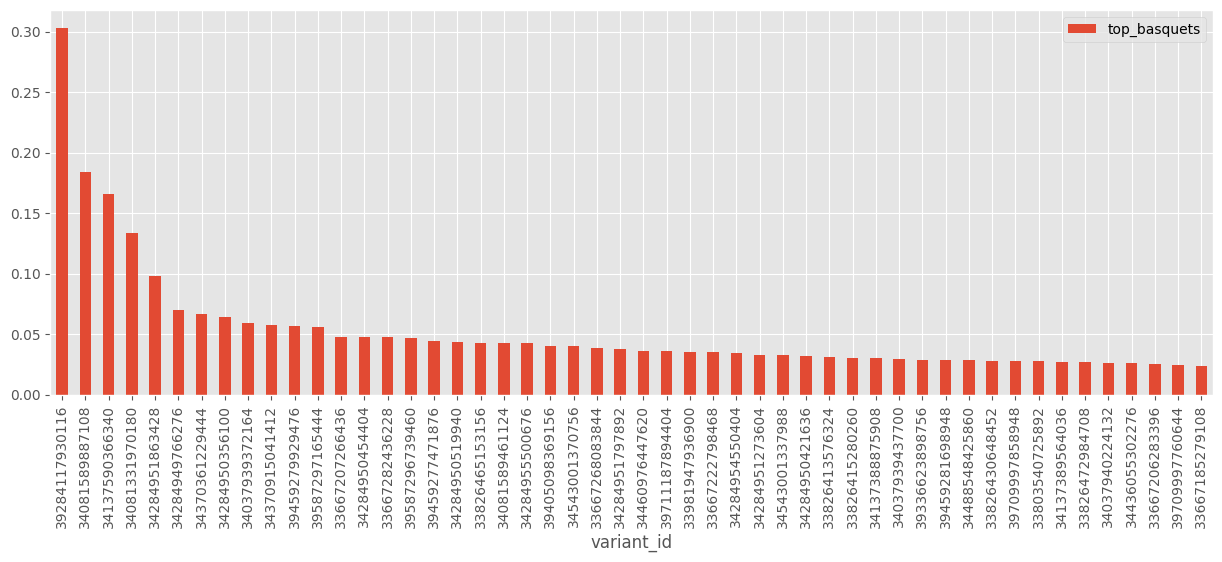

In [ ]:
variant_id_composition.sort_values(ascending=False, by='n_baskets').head(50).plot(x='variant_id', y='top_basquets', kind='bar', figsize=(15,5))

In [ ]:
#we only have inventory for 2 of the top5 most sold products history
top_5_product = variant_id_composition.sort_values(ascending=False, by= 'n_baskets').head(5).variant_id.values
inventory.loc[lambda x: x.variant_id.isin(top_5_product)]

,variant_id,price,compare_at_price,vendor,product_type,tags
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


In [ ]:
def compute_orders_size_and_value(x):
    return pd.Series({
        'order_size': len(x),
        'n_unique_products': x.variant_id.nunique(),
        'order_value': x.price.sum(),
        'ratio_missing_prod_data': x.price.isna().sum()/len(x)
    }

    )

orders_size = order_items.groupby(['id', 'order_date']).apply(compute_orders_size_and_value).reset_index()

In [ ]:
orders_size.head()

,id,order_date,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,2204073066628,2020-04-30,14.0,12.0,0.00,1.0
1,2204707520644,2020-04-30,25.0,23.0,0.00,1.0
2,2204838822020,2020-04-30,15.0,13.0,0.00,1.0
3,2208967852164,2020-05-01,10.0,9.0,0.00,1.0
4,2215889436804,2020-05-03,10.0,8.0,8.38,0.8


In [ ]:
orders_size.drop(['id','order_date'], axis= 1).describe()

,order_size,n_unique_products,order_value,ratio_missing_prod_data
count,8773.000000,8773.000000,8773.000000,8773.000000
mean,12.305711,9.553402,55.832173,0.143926
std,6.839507,6.338529,24.316070,0.150902
min,1.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,44.250000,0.047619
50%,11.000000,9.000000,51.860000,0.111111
75%,15.000000,13.000000,60.590000,0.200000
max,114.000000,70.000000,319.800000,1.000000


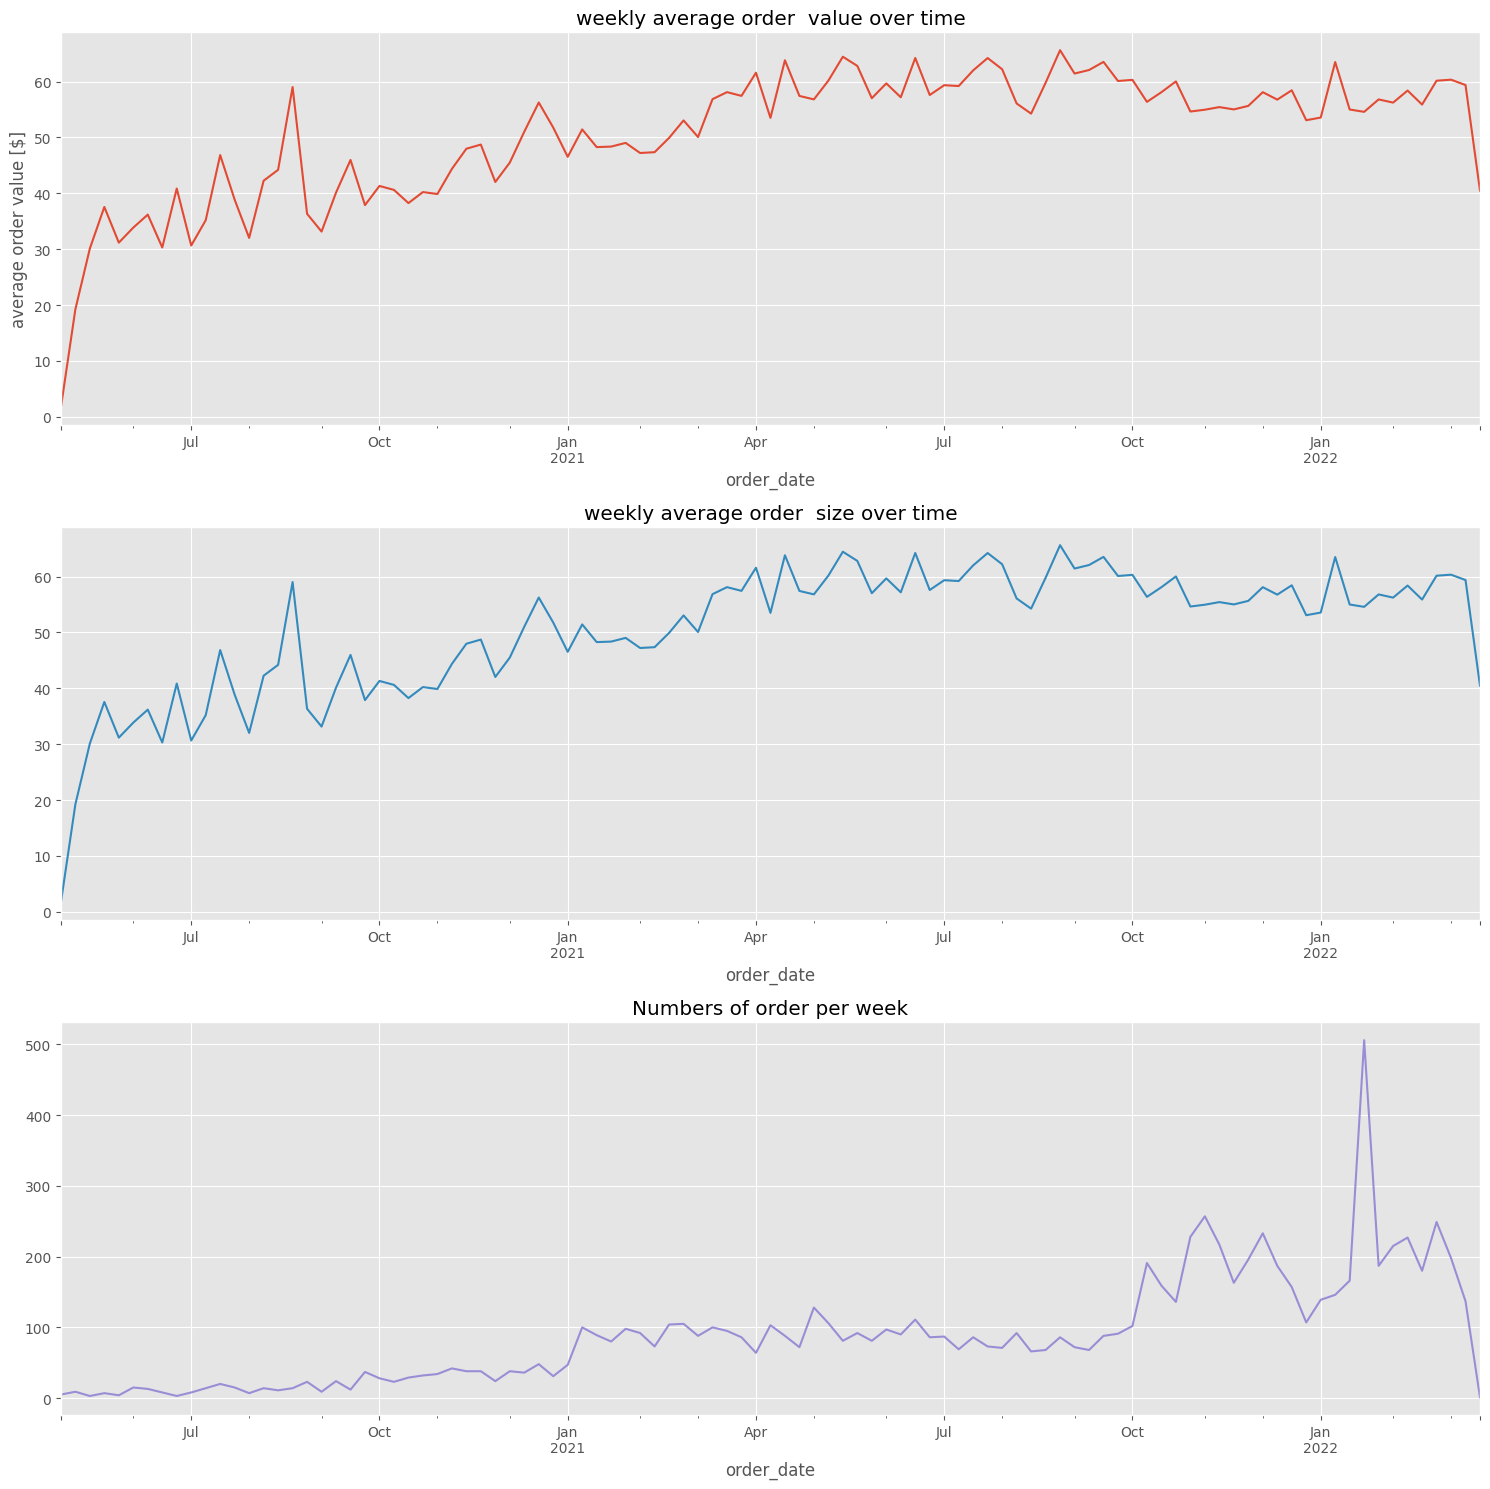

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))
#plot order_value over tume on a weekly basis

orders_size.groupby(pd.Grouper(key= 'order_date', freq= 'w'))['order_value'].mean().plot(ax=ax[0])
ax[0].set_ylabel('average order value [$]')
ax[0].set_title('weekly average order  value over time')

orders_size.groupby(pd.Grouper(key= 'order_date', freq= 'w'))['order_value'].mean().plot(ax=ax[1], color='C1')
ax[1].set_title('weekly average order  size over time')

orders_size.groupby(pd.Grouper(key= 'order_date', freq= 'w'))['id'].nunique().plot(ax=ax[2], color='C2')
ax[2].set_title('Numbers of order per week')

plt.tight_layout()

Text(0, 0.5, 'Retention rate')

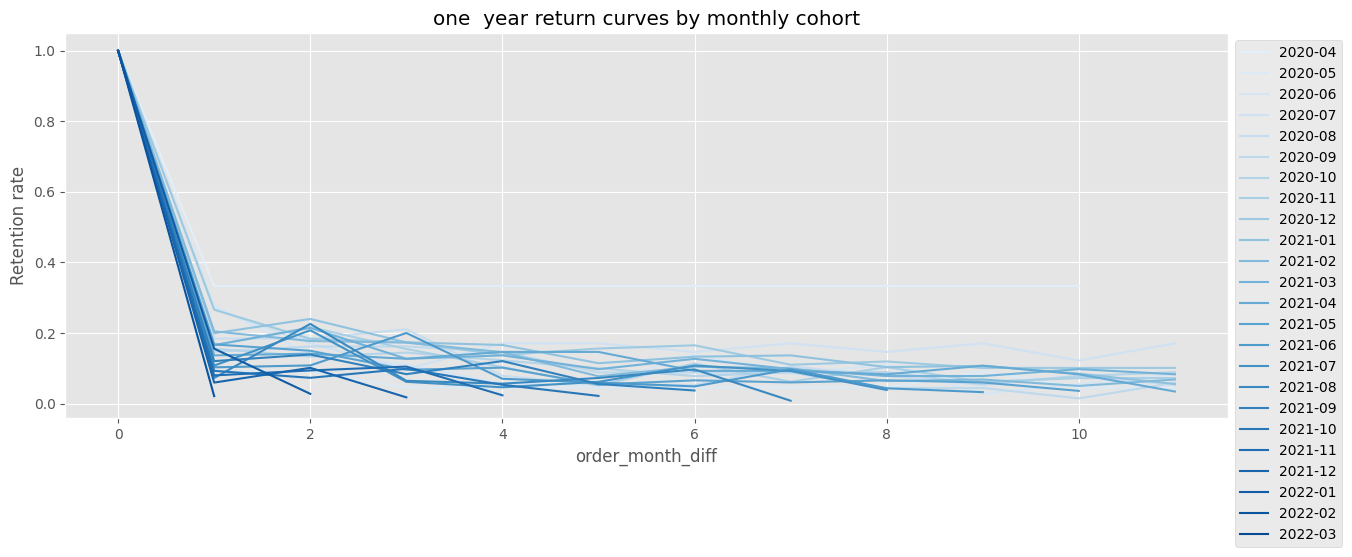

In [ ]:
#Retention curve cohort

def compute_cohort_stats(x):
    cohort_size = x.loc[lambda x: x.order_month_diff == 0, 'user_id'].nunique()
    return(x.groupby('order_month_diff')['user_id'].nunique() / cohort_size).rename('retention_rate')

fig, ax = plt.subplots(figsize=(15,5))

retention_curves = (
    orders.assign(first_order_month=lambda x: x.groupby('user_id')['order_date'].transform('min').dt.to_period('M'))
    .assign(order_month=lambda x: x.order_date.dt.to_period('M'))
    .assign(order_month_diff=lambda x: (x.order_month - x.first_order_month).apply(lambda x: x.n))
    .groupby('first_order_month').apply(compute_cohort_stats)
    .reset_index()
)

colors =  plt.cm.Blues(np.linspace(0.1, 0.9, retention_curves.first_order_month.nunique()))
count = 0

for label, df in retention_curves.groupby('first_order_month'):
    df.loc[lambda x: x.order_month_diff < 12].plot(x='order_month_diff', y= 'retention_rate', ax=ax, label=label, color= colors[count])
    count += 1

#legend outside of the box

plt.legend(bbox_to_anchor=(1,1), loc = 'upper left')
plt.title('one  year return curves by monthly cohort')
plt.ylabel('Retention rate')


# EDA

In [5]:
box_builder_sample_data = "/home/hasierza/datos/feature_frame.csv"

bb_df = pd.read_csv(box_builder_sample_data)

bb_df.head()



,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [6]:
bb_df.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [7]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [8]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']

label_col ='outcome'
features_cols = [col for col in bb_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols =[col for col in features_cols if col not in categorical_cols + binary_cols]

In [6]:
bb_df[label_col].value_counts()


outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [7]:
for col in binary_cols:
    print(f"value counts {col}: {bb_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value{bb_df.groupby(col)['outcome'].mean().to_dict()}")
    print("---------")


value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value{0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
---------
value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value{0.0: 0.011106039542947498, 1.0: 0.717948717948718}
---------
value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value{0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
---------
value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value{0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
---------


<Axes: >

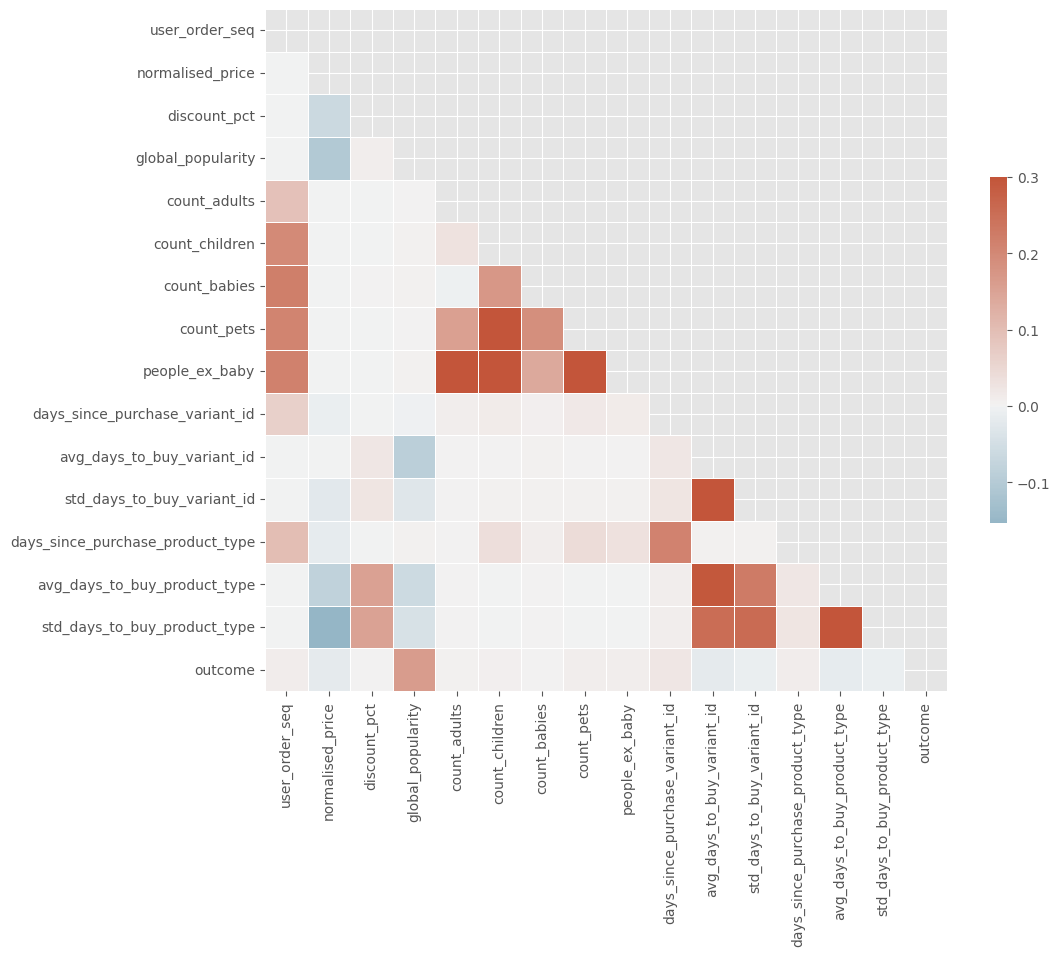

In [8]:
# Calcular la matriz de correlación
corr = bb_df[numerical_cols + [label_col]].corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(11, 9))

# Generar un mapa de colores divergente personalizado
cmap = nsn.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y la proporción de aspecto correcta
nsn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [9]:
#esto no me funciona

cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax =plt.subplots(rows, cols, figsize= (20, 5*rows))

ax= ax.flatten()

for i, col in enumerate(numerical_cols):
    nsn.kdeplot(bb_df.loc[lambda x : x.outcome == 0], label = '0',ax= ax[i])
    nsn.kdeplot(bb_df.loc[lambda x : x.outcome == 1], label = '1',ax= ax[i])
    ax[i].set_title(col)

ax[0].legend()

plt.tight_layout()

: 

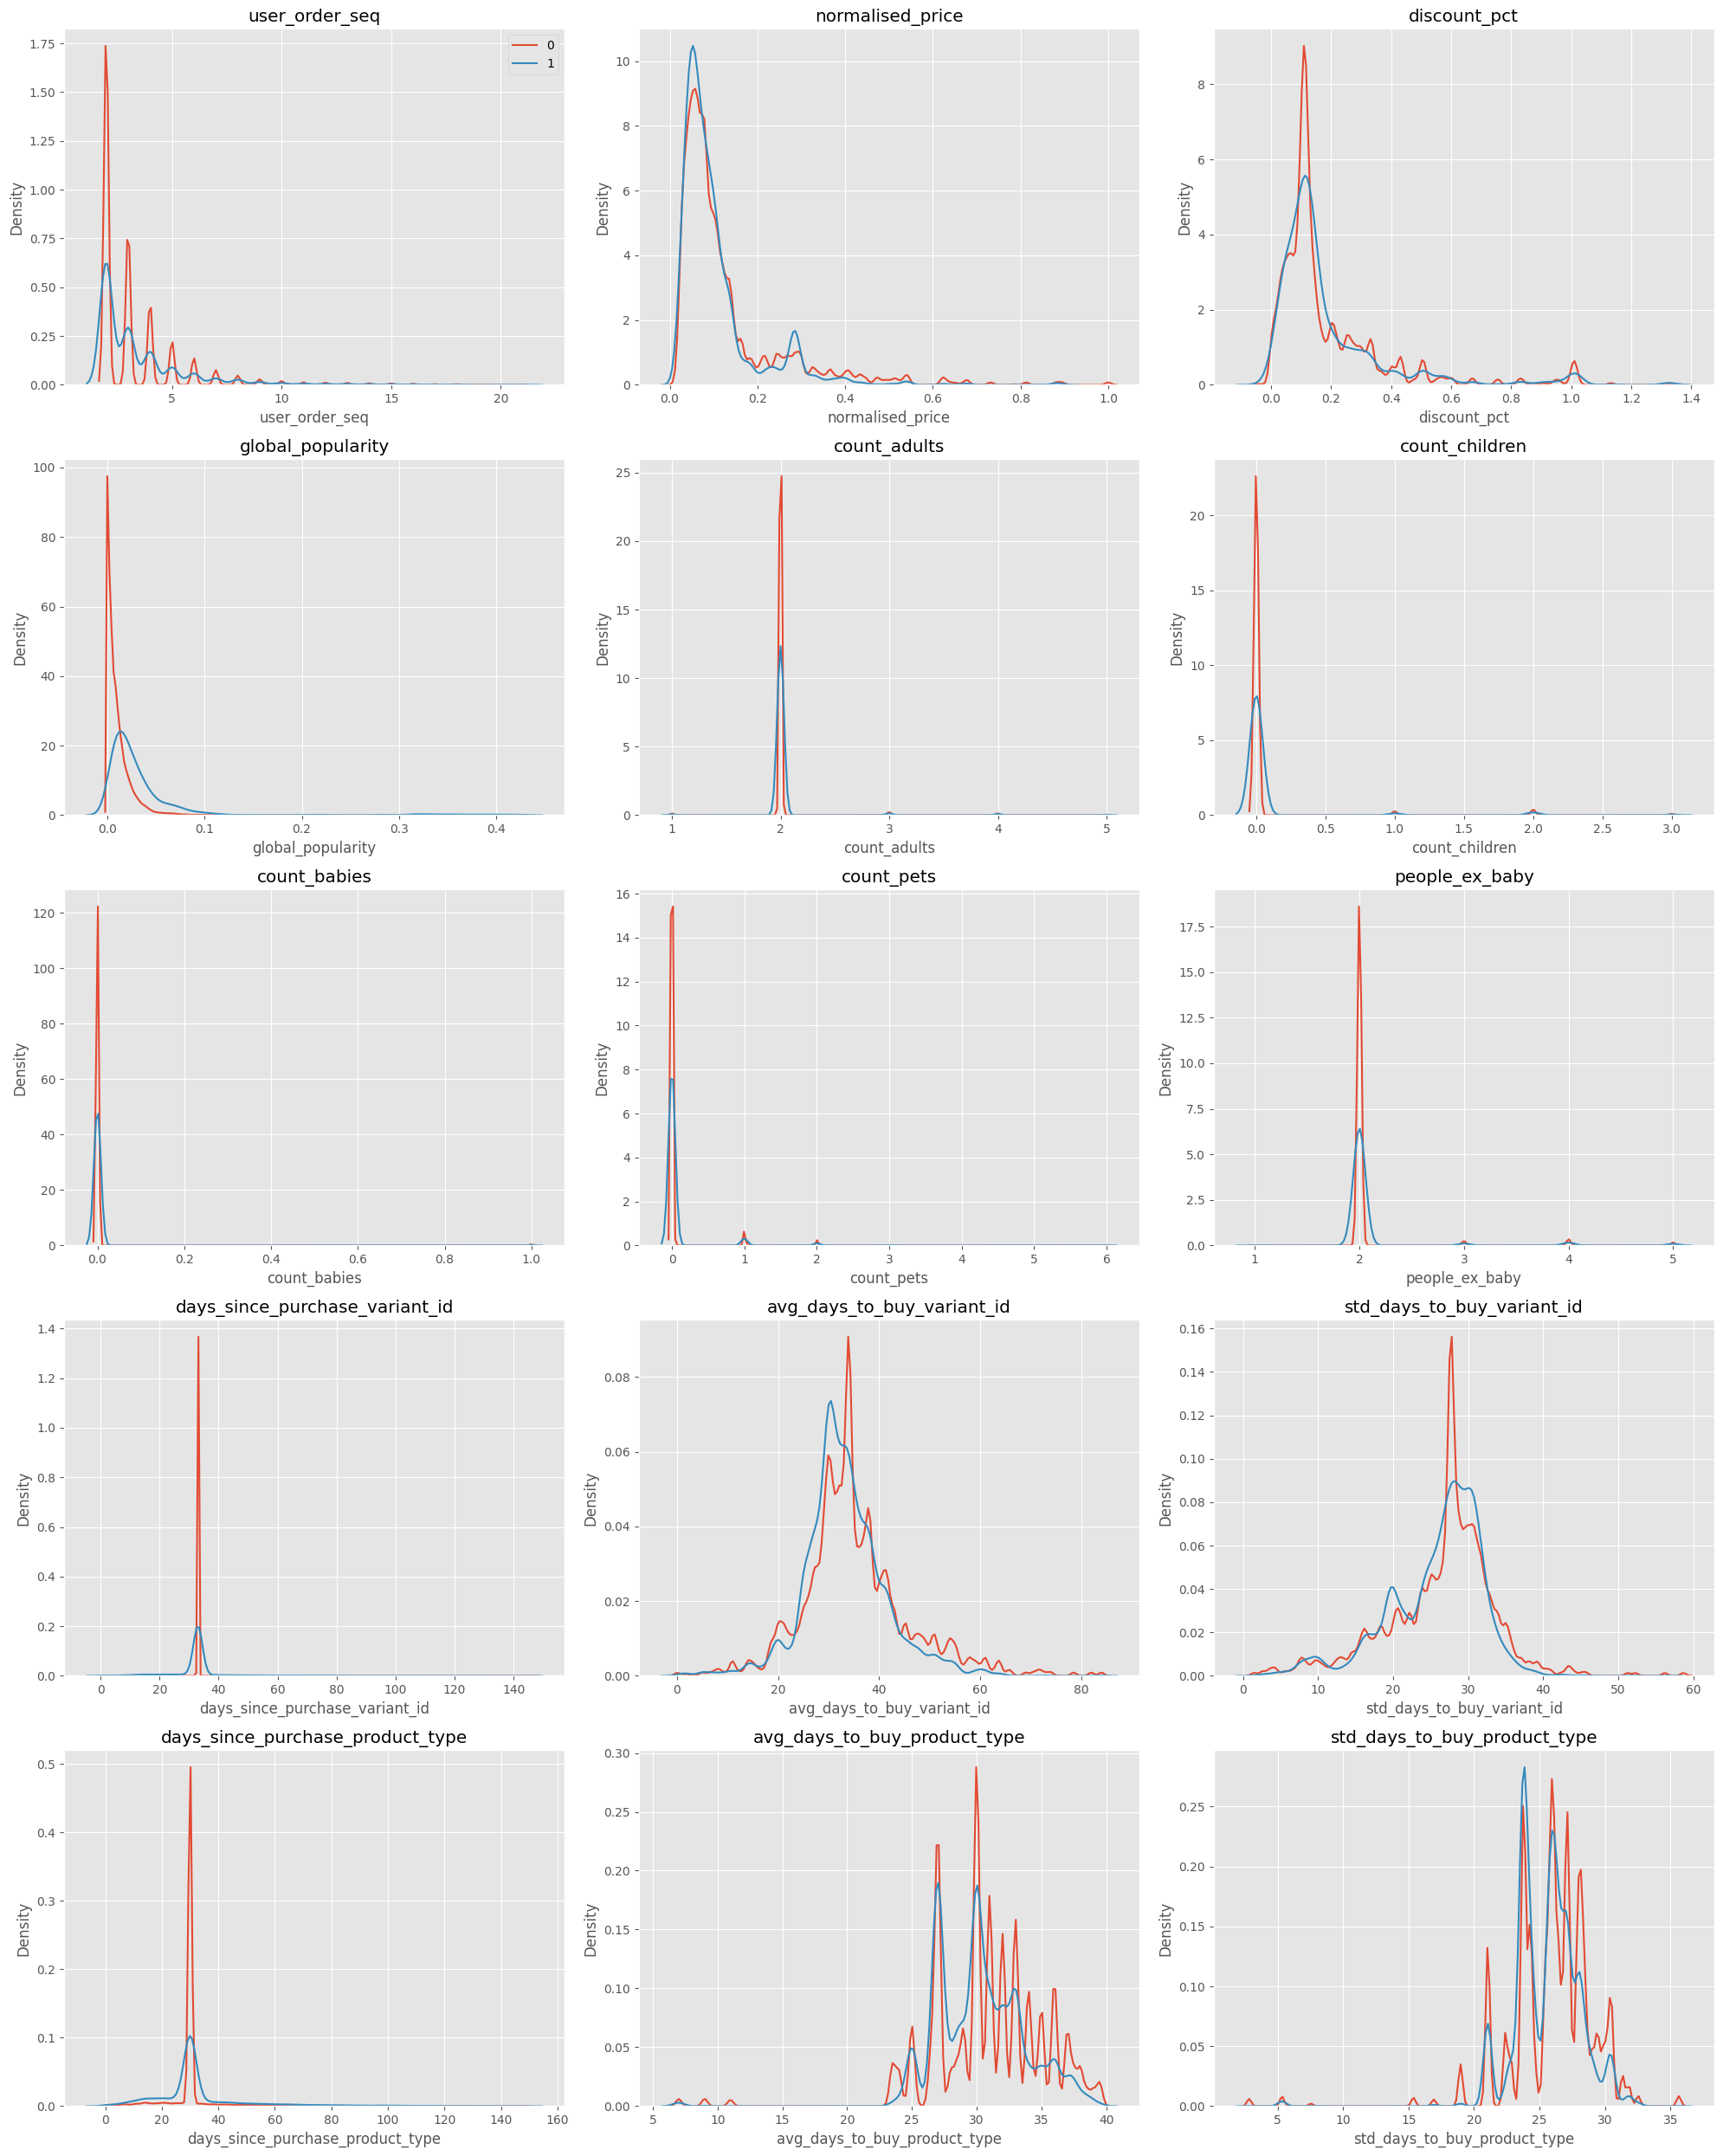

In [9]:
cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(20, 5 * rows))

ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    nsn.kdeplot(bb_df.loc[bb_df['outcome'] == 0, col], label='0', ax=ax[i])
    nsn.kdeplot(bb_df.loc[bb_df['outcome'] == 1, col], label='1', ax=ax[i])
    ax[i].set_title(col)

ax[0].legend()

plt.tight_layout()


In [ ]:
bb_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828
